# LFM_梯度下降算法实现

In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
#评分矩阵
R=np.array([[4,0,2,0,1],
           [0,2,3,0,0],
           [1,0,2,4,0],
           [5,0,0,3,1],
           [0,0,1,5,1],
           [0,3,2,4,1],])
R.shape

(6, 5)

## 算法实现

In [42]:
"""
输入参数：
R:评分矩阵
K：隐式向量维度个数
steps：最大迭代次数
lr：学习率,步长
lamda：正则化系数

输出：

p：用户特征矩阵M*K
q：物品特征举证K*N
"""

#给定超参数

K=2
max_iter=5000
lr=0.0002
lamda=0.004


In [59]:
#核心算法

def LFM_grad_desc(R,K,max_iter,lr,lamda):
    #基本维度参数定义
    M=R.shape[0]
    N=R.shape[1]
    #p,q初始值，随机生成
    P=np.random.rand(M,K)
    Q=np.random.rand(N,K)
    Q=Q.T
    #开始迭代
    lost=[]
    for step in range(max_iter):
        #对所有用户u，物品i做遍历，对应的特征向量Pu，Qi梯度下降
        for u in range(M):
            for i in range(N):
                #对于每一个大于零的评分，求出预测评分误差
                if R[u][i]>0:
                    eui=np.dot(P[u,:],Q[:,i])-R[u][i]
                    #带入公式，更新按照梯度下降算法Pu,Qi
                    for k in range(K):
                        P[u][k]=P[u][k]-lr*(2*eui*Q[k][i]+2*lamda*P[u][k])
                        Q[k][i]=Q[k][i]-lr*(2*eui*P[u][k]+2*lamda*Q[k][i])
        #u,i 遍历完成，所有特征向量更新完成
        predR=np.dot(P,Q)
    
        #计算当前损失函数
        cost =0
        for u in range(M):
            for i in range(N):
                if R[u][i]>0:
                    cost+=(np.dot(P[u,:],Q[:,i])-R[u][i])**2
                    #加上正则化项
                    for k in range(K):
                        cost+=lamda*(P[u][k]**2+Q[k][i]**2)
        lost.append(cost)
        if cost<0.00001:
            break

    return P,Q.T,cost,lost

In [60]:
P,Q,cost,lost=LFM_grad_desc(R,K,max_iter,lr,lamda)

In [61]:
R_hat=np.dot(P,Q.T)
R_hat

array([[ 3.96122685,  3.49744906,  1.92028752,  5.1040948 ,  1.09408442],
       [ 0.15087392,  2.0838956 ,  2.90931092,  4.14917501,  0.68755964],
       [ 1.09086021,  2.15488718,  2.26153652,  3.82170061,  0.69589033],
       [ 4.99890829,  2.73044834, -0.02392616,  3.02870184,  0.82337161],
       [ 5.26106889,  3.70092989,  1.17764119,  4.86475896,  1.14047387],
       [ 2.98435648,  2.8358166 ,  1.73877626,  4.25261591,  0.89078302]])

In [62]:
Q

array([[ 2.54779534, -0.0527286 ],
       [ 1.42119268,  1.09137533],
       [ 0.03078986,  1.62891636],
       [ 1.60357707,  2.23907038],
       [ 0.42943702,  0.36221481]])

In [63]:
P

array([[ 1.5785467 ,  1.14903646],
       [ 0.09614333,  1.7842234 ],
       [ 0.45671319,  1.37973591],
       [ 1.96098142, -0.05175496],
       [ 2.07909845,  0.68366067],
       [ 1.19297348,  1.04489391]])

In [64]:
cost

0.9366008639016854

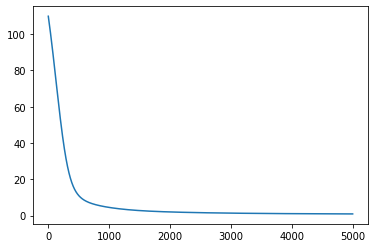

In [72]:
plt.figure
plt.plot(range(len(lost)),lost)